### **Part 1: Polynomial Regression on generated Database**

### Importing libraries
We are using some libraries in this project including numpy, matplotlib and scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import operator
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

### Creating the dataset
Here we are creating the random dataset.
The formula we are using is:      
**y = random(from -3 to 20) + x - 4x^2 + 7x^3**


In [0]:
np.random.seed(0)
x = np.random.normal(0, 1, 20)
y = np.random.normal(0, 1, 20)

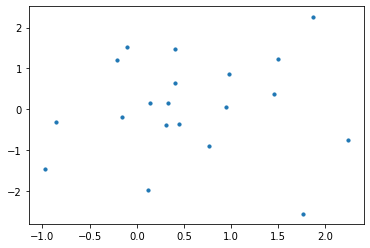

In [3]:
plt.scatter(x,y, s=10)
plt.show()

In [0]:
#Making y a 2D database
y = y[:, np.newaxis]

### Doing Polynomial Regression
In these cells, we are creating doing Polynomial Regression using **tensorflow**.

First we have to modify the data so that it can be accpeted by tensorflow.

Then we have to set some parameters like the optimizer and the loss function.

Finnaly we train the model for 12000 steps

In [0]:
deg=2
W = tf.Variable(tf.random_normal([deg,1]), name='weight')
#bias
b = tf.Variable(tf.random_normal([1]), name='bias')

In [0]:
x_=tf.placeholder(tf.float32,shape=[None,deg])
y_=tf.placeholder(tf.float32,shape=[None, 1])

In [0]:
def modify_input(x,x_size,n_value):
   x_new=np.zeros([x_size,n_value])    
   for i in range(deg):
      x_new[:,i]=np.power(x,(i+1))
      x_new[:,i]=x_new[:,i]/np.max(x_new[:,i])
   return x_new

In [0]:
x_modified=modify_input(x,x.size,deg)
Y_pred=tf.add(tf.matmul(x_,W),b)

In [9]:
#algortihm
loss = tf.reduce_mean(tf.square(Y_pred -y_ ))
#training algorithm
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
#initializing the variables
init = tf.global_variables_initializer()

#starting the session session 
sess = tf.Session()
sess.run(init)

epoch=12000

for step in range(epoch):     
     _, c=sess.run([optimizer, loss], feed_dict={x_: x_modified, y_: y})
     if step%1000==0 :
       print ("loss: " + str(c))

y_test=sess.run(Y_pred, feed_dict={x_:x_modified})

loss: 2.4484973
loss: 1.3254359
loss: 1.3242522
loss: 1.3242308
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304
loss: 1.3242304


### Calculating error
Here we are calculating the mean_square_error and the R2 score.

In [10]:
rmse = np.sqrt(mean_squared_error(y,y_test))
r2 = r2_score(y,y_test)
print(rmse)
print(r2)

1.1507521216059198
0.06144049111930627


### Visualising results
First we find the function generated by polynomial regression, and then graph the results

In [11]:
print("Model paramters:")
print(sess.run(W))
print("bias:%f" %sess.run(b))

Model paramters:
[[ 1.22756  ]
 [-1.6521428]]
bias:0.088324


In [12]:
res = "y = f(x) = " + str(sess.run(b)[0])

for i, r in enumerate(sess.run(W)):
    res = res + " + {}*x^{}".format("%.2f" % r[0], i + 1)

print (res)

y = f(x) = 0.088324 + 1.23*x^1 + -1.65*x^2


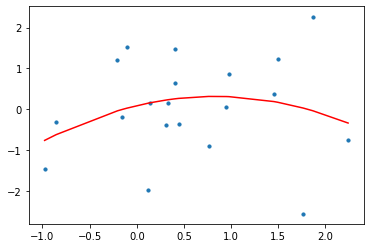

In [13]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_test), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='red')
plt.show()

### **Part 2: Polynomial Regression on imported Database**

### Importing database
We are importing the database from a **Position_Salaries.csv** from this link https://raw.githubusercontent.com/SiddhantAttavar/PolynomialRegression/master/Position_Salaries.csv.                          
Then we create two arrays **X** and **Y** to store the data. **X** stores the level data and **Y** stores the salary data.

In [14]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/SiddhantAttavar/PolynomialRegression/master/Position_Salaries.csv' 
datas = pd.read_csv(url) 
print(datas)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [0]:
X = datas.iloc[:, 1].values 
Y = datas.iloc[:, 2].values 
Y = Y[:, np.newaxis]

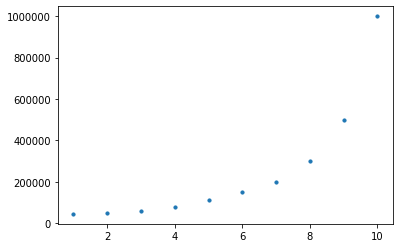

In [16]:
plt.scatter(X, Y, s=10)
plt.show()

### Doing Polynomial Regression
In these cells, we are creating doing Polynomial Regression using **tensorflow**.

First we have to modify the data so that it can be accpeted by tensorflow.

Then we have to set some parameters like the optimizer and the loss function.

Finnaly we train the model for 12000 steps

In [0]:
deg = 2 #@param {type:"slider", min:1, max:20, step:1}
W = tf.Variable(tf.random_normal([deg,1]), name='weight')
#bias
b = tf.Variable(tf.random_normal([1]), name='bias')

In [0]:
X_=tf.placeholder(tf.float32,shape=[None,deg])
Y_=tf.placeholder(tf.float32,shape=[None, 1])

In [0]:
X_modified=modify_input(X,X.size,deg)
Y_pred=tf.add(tf.matmul(X_,W),b)

In [20]:
#algortihm
loss = tf.reduce_mean(tf.square(Y_pred -Y_ ))
#training algorithm
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
#initializing the variables
init = tf.global_variables_initializer()

#starting the session session 
sess = tf.Session()
sess.run(init)

epoch=12000

for step in range(epoch):     
     _, c=sess.run([optimizer, loss], feed_dict={X_: X_modified, Y_: Y})
     if step%1000==0 :
       print ("loss: " + str(c))
Y_test=sess.run(Y_pred, feed_dict={X_:X_modified})

loss: 142913540000.0
loss: 14360017000.0
loss: 11562736000.0
loss: 9794872000.0
loss: 8677595000.0
loss: 7971484700.0
loss: 7525219000.0
loss: 7243189000.0
loss: 7064943000.0
loss: 6952298000.0
loss: 6881107000.0
loss: 6836113400.0


### Calculating error
Here we are calculating the mean_square_error and the R2 score.

In [21]:
rmse = np.sqrt(mean_squared_error(y,y_test))
r2 = r2_score(y,y_test)
print(rmse)
print(r2)

1.1507521216059198
0.06144049111930627


### Visualising results
First we find the function generated by polynomial regression, and then graph the results

In [22]:
print("Model paramters:")
print(sess.run(W))
print("bias:%f" %sess.run(b))

Model paramters:
[[-1220569. ]
 [ 1847921.4]]
bias:209310.765625


In [23]:
res = "y = f(x) = " + str(sess.run(b)[0])

for i, r in enumerate(sess.run(W)):
    res = res + " + {}*x^{}".format("%.2f" % r[0], i + 1)

print (res)

y = f(x) = 209310.77 + -1220569.00*x^1 + 1847921.38*x^2


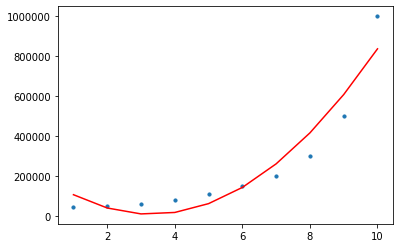

In [24]:
plt.scatter(X, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,Y_test), key=sort_axis)
X, Y_poly_pred = zip(*sorted_zip)
plt.plot(X, Y_poly_pred, color='red')
plt.show()